In [67]:
import os
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

def computePluckerCoord(x1, y1, x2, y2):
    k = (y1 - y2) / (x1 - x2)
    theta = np.arctan(k)
    A = y2 - y1
    B = x1 - x2
    C = x2*y1 - x1*y2
    distance = np.abs(C) / np.sqrt(A**2 + B**2)
    return theta, distance

path = "images"
images = []
labels = []
for file in os.listdir(path):
    if file.endswith(".jpg"):
        image_path = os.path.join(path, file)
        images.append(image_path)
    if file.endswith(".json"):
        label_path = os.path.join(path, file)
        labels.append(label_path)

d0ErrorList = []
d1ErrorList = []
theta0ErrorList = []
theta1ErrorList = []

for i in range(300):
    # if i != 1:
    #     continue

    image = cv2.imread(images[i])
    with open(labels[i], "r") as f:
        label = json.load(f)
        uv1 = label["RunwayVertexCoord"]["Coord1"]["UVCoord"]
        uv2 = label["RunwayVertexCoord"]["Coord2"]["UVCoord"]
        uv3 = label["RunwayVertexCoord"]["Coord3"]["UVCoord"]
        uv4 = label["RunwayVertexCoord"]["Coord4"]["UVCoord"]

    r = 0.3
    xmax = max(uv1[0], uv2[0], uv3[0], uv4[0])
    xmin = min(uv1[0], uv2[0], uv3[0], uv4[0])
    ymax = max(uv1[1], uv2[1], uv3[1], uv4[1])
    ymin = min(uv1[1], uv2[1], uv3[1], uv4[1])
    xlen = xmax - xmin
    ylen = ymax - ymin
    Bxmin = xmin - xlen * r
    Bxmax = xmax + xlen * r
    Bymin = ymin - ylen * r
    Bymax = ymax + ylen * r
    theta0, d0 = computePluckerCoord(uv1[0], uv1[1], uv2[0], uv2[1])
    theta1, d1 = computePluckerCoord(uv3[0], uv3[1], uv4[0], uv4[1])

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lsd = cv2.createLineSegmentDetector(0)
    lines, width, prec, nfa = lsd.detect(gray)
    
    # drawn_img = lsd.drawSegments(image, lines)
    # # plt.figure(figsize=(10,10))
    # plt.figure()
    # plt.imshow(cv2.cvtColor(drawn_img, cv2.COLOR_BGR2RGB))

    linesBounded = []
    dList = []
    thetaList = []
    for line in lines:
        line = line[0]
        if(
            (Bxmin < line[0] < Bxmax) and
            (Bxmin < line[2] < Bxmax) and
            (Bymin < line[1] < Bymax) and
            (Bymin < line[3] < Bymax)
            
        ):
            linesBounded.append(line)
            theta, d = computePluckerCoord(line[0], line[1], line[2], line[3])
            dList.append(d)
            thetaList.append(theta)
            image = cv2.line(image, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])), (0, 255, 0), 2)
    
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    index0 = np.argmin(np.abs(thetaList - theta0))
    d0Error = (dList[index0] - d0)
    theta0Error = (thetaList[index0] - theta0)
    d0ErrorList.append(d0Error)
    theta0ErrorList.append(theta0Error)
    line0 = linesBounded[index0]

    index1 = np.argmin(np.abs(thetaList - theta1))
    d1Error = (dList[index1] - d1)
    theta1Error = (thetaList[index1] - theta1)
    d1ErrorList.append(d1Error)
    theta1ErrorList.append(theta1Error)
    line1 = linesBounded[index1]

    line = line0
    image = cv2.line(image, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])), (255, 0, 0), 2)
    line = line1
    image = cv2.line(image, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])), (255, 0, 0), 2)
    cv2.imwrite("res/" + str(i) + ".jpg", image)


Text(0, 0.5, 'frequency')

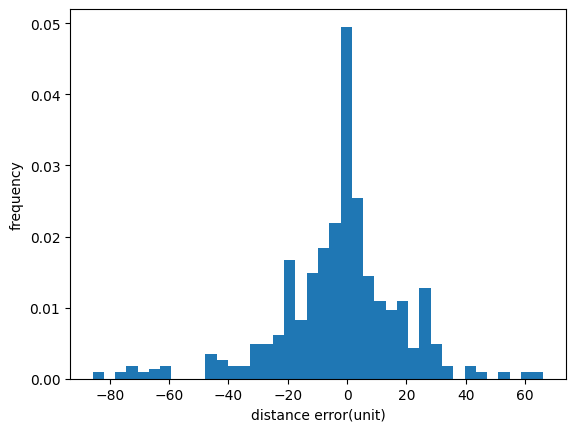

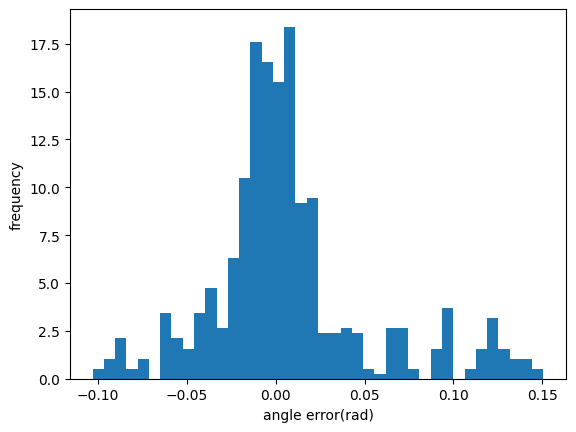

In [69]:
plt.figure()
plt.hist(d0ErrorList + d1ErrorList, bins=40, density=True)
plt.xlabel("distance error(unit)")
plt.ylabel("frequency")

plt.figure()
plt.hist(theta0ErrorList + theta1ErrorList, bins=40, density=True)
plt.xlabel("angle error(rad)")
plt.ylabel("frequency")


<Figure size 640x480 with 0 Axes>

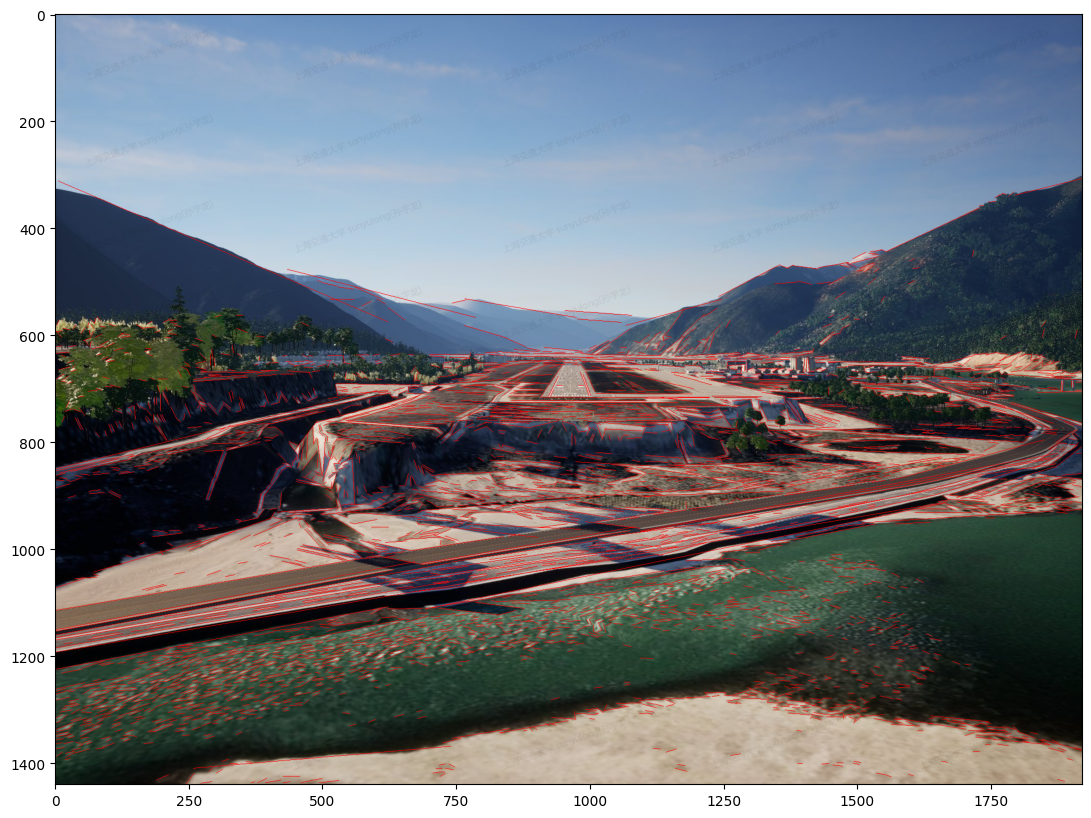

<Figure size 640x480 with 0 Axes>

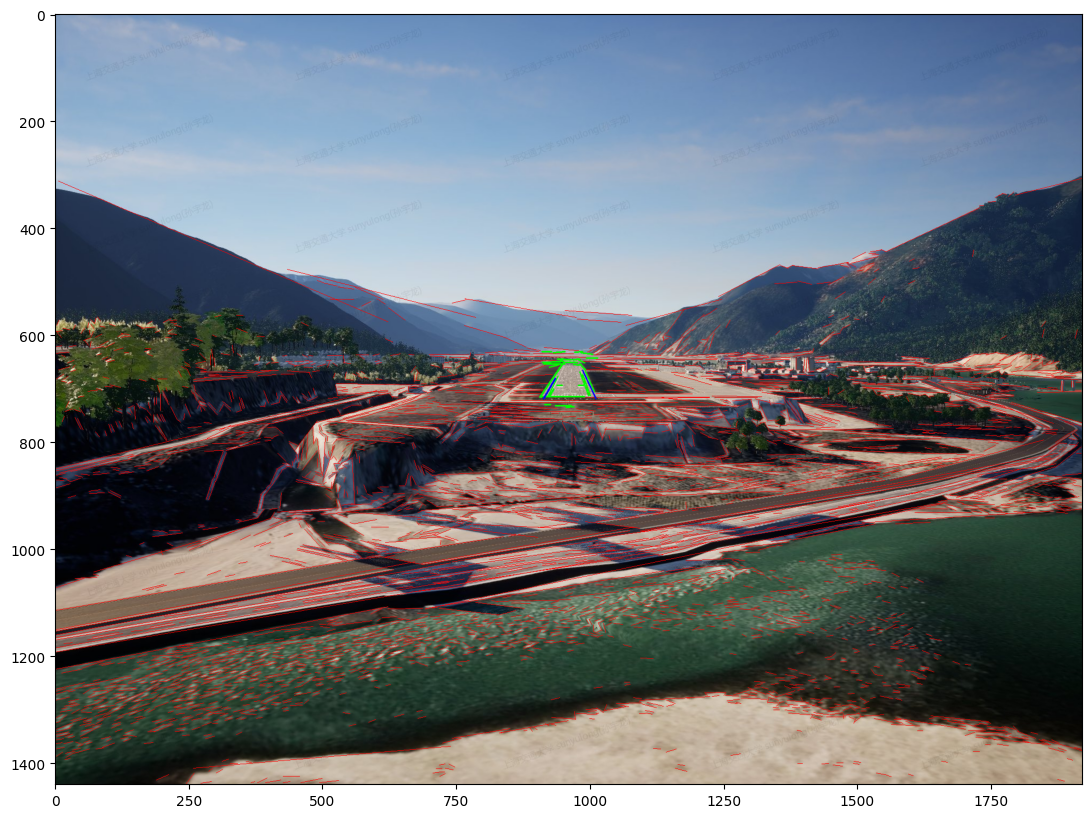

In [65]:
import os
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

def computePluckerCoord(x1, y1, x2, y2):
    k = (y1 - y2) / (x1 - x2)
    theta = np.arctan(k)
    A = y2 - y1
    B = x1 - x2
    C = x2*y1 - x1*y2
    distance = np.abs(C) / np.sqrt(A**2 + B**2)
    return theta, distance

path = "images"
images = []
labels = []
for file in os.listdir(path):
    if file.endswith(".jpg"):
        image_path = os.path.join(path, file)
        images.append(image_path)
    if file.endswith(".json"):
        label_path = os.path.join(path, file)
        labels.append(label_path)

d0ErrorList = []
d1ErrorList = []
theta0ErrorList = []
theta1ErrorList = []

for i in range(500):
    if i != 229:
        continue

    image = cv2.imread(images[i])
    with open(labels[i], "r") as f:
        label = json.load(f)
        uv1 = label["RunwayVertexCoord"]["Coord1"]["UVCoord"]
        uv2 = label["RunwayVertexCoord"]["Coord2"]["UVCoord"]
        uv3 = label["RunwayVertexCoord"]["Coord3"]["UVCoord"]
        uv4 = label["RunwayVertexCoord"]["Coord4"]["UVCoord"]

    # image = cv2.line(image, (int(uv1[0]), int(uv1[1])), (int(uv2[0]), int(uv2[1])), (255, 0, 0), 2)
    # image = cv2.line(image, (int(uv3[0]), int(uv3[1])), (int(uv4[0]), int(uv4[1])), (255, 0, 0), 2)

    r = 0.3
    xmax = max(uv1[0], uv2[0], uv3[0], uv4[0])
    xmin = min(uv1[0], uv2[0], uv3[0], uv4[0])
    ymax = max(uv1[1], uv2[1], uv3[1], uv4[1])
    ymin = min(uv1[1], uv2[1], uv3[1], uv4[1])
    xlen = xmax - xmin
    ylen = ymax - ymin
    Bxmin = xmin - xlen * r
    Bxmax = xmax + xlen * r
    Bymin = ymin - ylen * r
    Bymax = ymax + ylen * r
    theta0, d0 = computePluckerCoord(uv1[0], uv1[1], uv2[0], uv2[1])
    theta1, d1 = computePluckerCoord(uv3[0], uv3[1], uv4[0], uv4[1])


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lsd = cv2.createLineSegmentDetector(0)
    lines, width, prec, nfa = lsd.detect(gray)
    

    drawn_img = lsd.drawSegments(image, lines)
    plt.figure()
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(drawn_img, cv2.COLOR_BGR2RGB))

    linesBounded = []
    dList = []
    thetaList = []
    for line in lines:
        line = line[0]
        if(
            (Bxmin < line[0] < Bxmax) and
            (Bxmin < line[2] < Bxmax) and
            (Bymin < line[1] < Bymax) and
            (Bymin < line[3] < Bymax)
            
        ):
            linesBounded.append(line)
            theta, d = computePluckerCoord(line[0], line[1], line[2], line[3])
            dList.append(d)
            thetaList.append(theta)
            image = cv2.line(image, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])), (0, 255, 0), 2)
    
    line = line0
    image = cv2.line(image, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])), (255, 0, 0), 2)
    line = line1
    image = cv2.line(image, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])), (255, 0, 0), 2)

    plt.figure()
    plt.figure(figsize=(20,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))